# Aviation Accident Analysis

## Overview

Air travel is considered one of the safest modes of transportation, but accidents still occur. In my analysis, I aim to identify the safest aircraft by examining accident data and identifying trends related to fatalities, injuries, and aircraft damage.

## Problem Statement

In this project, I aim to assess aircraft safety by analyzing accident data, focusing on key factors such as aircraft damage and fatality rates. This analysis will help determine which aircraft are the safest and provide actionable insights for enhancing aviation safety standards.

## Data Understanding
The dataset contains various details about aviation accidents, including:

- **Aircraft Details**  
  - `Make`: The aircraft manufacturer.  
  - `Model`: The specific aircraft model.  

- **Injury and Fatality Data**  
  - `Total.Fatal.Injuries`: Number of fatalities in an accident.  
  - `Total.Serious.Injuries`: Number of serious injuries.  
  - `Total.Minor.Injuries`: Number of minor injuries.  
  - `Total.Uninjured`: Number of people who were not injured.  

- **Flight and Accident Information**  
  - `Aircraft.damage`: The extent of damage to the aircraft.  
  - `Broad.phase.of.flight`: The phase of flight during which the accident occurred.  

Using the above columns, I will analyze aircraft safety using the following four objectives:  

## Objectives

1. **Aircraft Damage Distribution by Manufacturer** – Understanding how often aircraft sustain serious damage. 
2. **Fatalities by Phase of Flight** – Identifying when most fatal accidents occur. 
3. **Fatality Rate by Aircraft Model** – Comparing different aircraft models based on fatalities.  
4. **Total Uninjured Persons by Aircraft Make** – Highlighting manufacturers with the safest aircraft.  

## Data Preparation

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context('talk')

In [3]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\ADMIN\Documents\MoringaSchool\Phase1\Phase1Project\data\AviationData.csv', encoding="latin1", low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Understanding the dataset

In [4]:
# Inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# show the total number of missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## Data Cleaning and Normalization
Unnecessary columns will be removed, and missing or inconsistent values will be handled to ensure data quality.

In [6]:
# gives the columns names in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
# Keep only relevant columns
relevant_columns = ['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Aircraft.damage', 'Broad.phase.of.flight']
df = df[relevant_columns]
df.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight
0,Stinson,108-3,2.0,0.0,0.0,0.0,Destroyed,Cruise
1,Piper,PA24-180,4.0,0.0,0.0,0.0,Destroyed,Unknown
2,Cessna,172M,3.0,NaN,NaN,NaN,Destroyed,Cruise
3,Rockwell,112,2.0,0.0,0.0,0.0,Destroyed,Cruise
4,Cessna,501,1.0,2.0,NaN,0.0,Destroyed,Approach


In [8]:
# check missing values
df.isna().sum()

Make                         63
Model                        92
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Aircraft.damage            3194
Broad.phase.of.flight     27165
dtype: int64

- From the missing values in the columns above, I will drop the missing values in the columns ``Make`` and ``Model`` 
- I will replace the columns `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`, `Aircraft.damage` and `Broad.phase.of.flight`

### Dealing with missing values

In [9]:
# Drop Make and Model (missing values are a small percentage)
df = df.dropna(subset=['Make', 'Model'])

df = df.reset_index(drop=True)

In [10]:
# rechecking whether they have been removed
df.isna().sum()

Make                          0
Model                         0
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Aircraft.damage            3172
Broad.phase.of.flight     27094
dtype: int64

### Replacing the remaining columns

In [11]:
# Fill missing injury values with 0 (I wamt to assume no reported injury)
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)

In [12]:
# Fill missing aircraft damage and phase of flight with 'Unknown'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

In [13]:
# rechecking whether they have been removed
df.isna().sum()

Make                      0
Model                     0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Aircraft.damage           0
Broad.phase.of.flight     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88777 entries, 0 to 88776
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88777 non-null  object 
 1   Model                   88777 non-null  object 
 2   Total.Fatal.Injuries    88777 non-null  float64
 3   Total.Serious.Injuries  88777 non-null  float64
 4   Total.Minor.Injuries    88777 non-null  float64
 5   Total.Uninjured         88777 non-null  float64
 6   Aircraft.damage         88777 non-null  object 
 7   Broad.phase.of.flight   88777 non-null  object 
dtypes: float64(4), object(4)
memory usage: 5.4+ MB


- Now the dataset is clean with no missing values
- The dataset has 88,777 rows and 8 columns

### Fixing Inconsistencies

In [17]:
# Fix inconsistencies in Make and Model columns
df["Make"] = df["Make"].str.title().str.strip()
df["Model"] = df["Model"].str.strip()

### Dealing with the Injuries columns

In [18]:
# Convert the columns to numeric and set as Int64
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]

for col in injury_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# Replace missing values in injury columns with 0 (assuming no injuries were reported)
df[injury_cols] = df[injury_cols].fillna(0)

df.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight
0,Stinson,108-3,2,0,0,0,Destroyed,Cruise
1,Piper,PA24-180,4,0,0,0,Destroyed,Unknown
2,Cessna,172M,3,0,0,0,Destroyed,Cruise
3,Rockwell,112,2,0,0,0,Destroyed,Cruise
4,Cessna,501,1,2,0,0,Destroyed,Approach


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88777 entries, 0 to 88776
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    88777 non-null  object
 1   Model                   88777 non-null  object
 2   Total.Fatal.Injuries    88777 non-null  Int64 
 3   Total.Serious.Injuries  88777 non-null  Int64 
 4   Total.Minor.Injuries    88777 non-null  Int64 
 5   Total.Uninjured         88777 non-null  Int64 
 6   Aircraft.damage         88777 non-null  object
 7   Broad.phase.of.flight   88777 non-null  object
dtypes: Int64(4), object(4)
memory usage: 5.8+ MB


## Data Analysis

## Objective 1: Aircraft Damage Distribution by Manufacturer

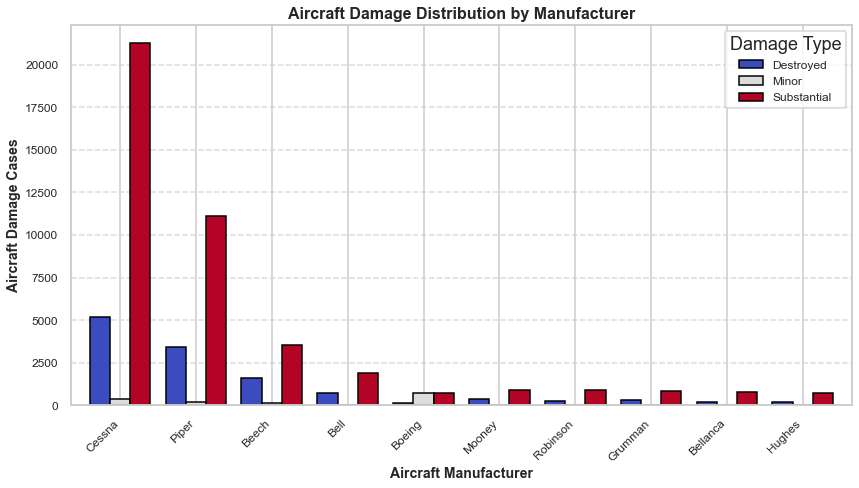

In [20]:
# Remove rows where Aircraft.damage is "Unknown"
df = df[df["Aircraft.damage"].notna()]
df = df[df["Aircraft.damage"] != "Unknown"]

# Count of each damage level per manufacturer
damage_counts = df.groupby(["Make", "Aircraft.damage"]).size().unstack(fill_value=0)

# Select top 10 manufacturers with more total cases
top_10_makes = damage_counts.sum(axis=1).sort_values(ascending=False).head(10).index
damage_counts_top10 = damage_counts.loc[top_10_makes]

# plot the chart
plt.figure(figsize=(14, 7))
damage_counts_top10.plot(kind="bar", colormap="coolwarm", edgecolor="black", width=0.8,  ax=plt.gca())

# labels
plt.xlabel("Aircraft Manufacturer", fontsize=14, fontweight='bold')
plt.ylabel("Aircraft Damage Cases", fontsize=14, fontweight='bold')
plt.title("Aircraft Damage Distribution by Manufacturer", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Damage Type", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# show plot
plt.show();

- Cessna and Piper show the highest number of aircraft damage cases, with a large portion destroyed and substantial damages.

- This suggests that smaller general aviation aircraft may be more prone to severe damage compared to larger commercial aircraft.

## Objective 2: Fatalities by Phase of Flight

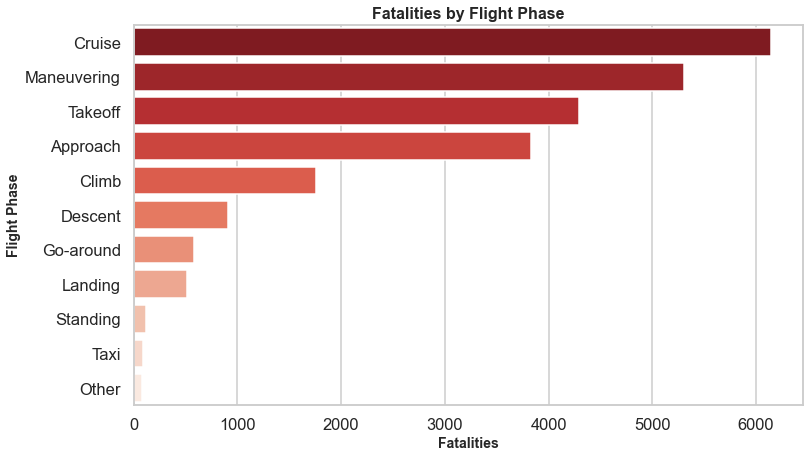

In [21]:
# for this section I am only using the fatalities column
df_filtered = df[df["Broad.phase.of.flight"] != "Unknown"]

# Group by Flight Phase and sum Total Fatal Injuries
fatalities_by_phase = df_filtered.groupby("Broad.phase.of.flight")["Total.Fatal.Injuries"].sum().reset_index()

# Sort by number of fatalities
fatalities_by_phase = fatalities_by_phase.sort_values(by="Total.Fatal.Injuries", ascending=False)

# plot
plt.figure(figsize=(12, 7))
sns.barplot(y="Broad.phase.of.flight", x="Total.Fatal.Injuries", data=fatalities_by_phase, palette="Reds_r")

# labels
plt.ylabel("Flight Phase", fontsize=14, fontweight="bold")
plt.xlabel("Fatalities", fontsize=14, fontweight="bold")
plt.title("Fatalities by Flight Phase", fontsize=16, fontweight="bold")

# Show plot
plt.show()

- The cruise phase has the highest fatalities (more than 6,000 cases).
- The maneuvering phase follows, with over 5,000 fatalities.
- Mid-flight incidents, particularly during cruise and maneuvering phases, account for the highest fatality counts.

## Objective 3: Fatality Rate by Aircraft Model

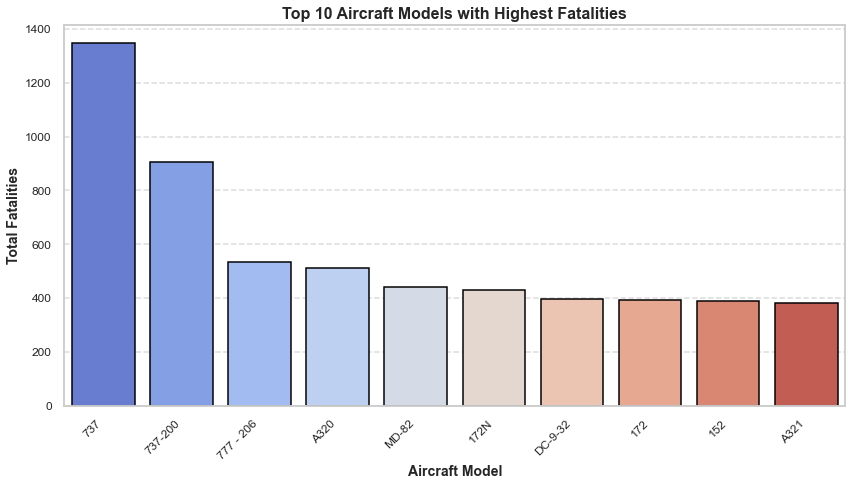

In [22]:
# Group by aircraft model and sum total fatalities
top_fatal_models = df.groupby("Model")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_fatal_models.index, y=top_fatal_models.values, palette="coolwarm", edgecolor="black")

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Aircraft Model", fontsize=14, fontweight='bold')
plt.ylabel("Total Fatalities", fontsize=14, fontweight='bold')
plt.title("Top 10 Aircraft Models with Highest Fatalities", fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show();

- Boeing 737 has the highest fatalities (approximately 1350 cases) - maybe because it is the the most widely used commercial aircraft.
-  737-200 also has significant fatalities (is an older generation model tending to have higher accident rates due to outdated systems)

## Objective 4: Total Uninjured Persons by Aircraft Make

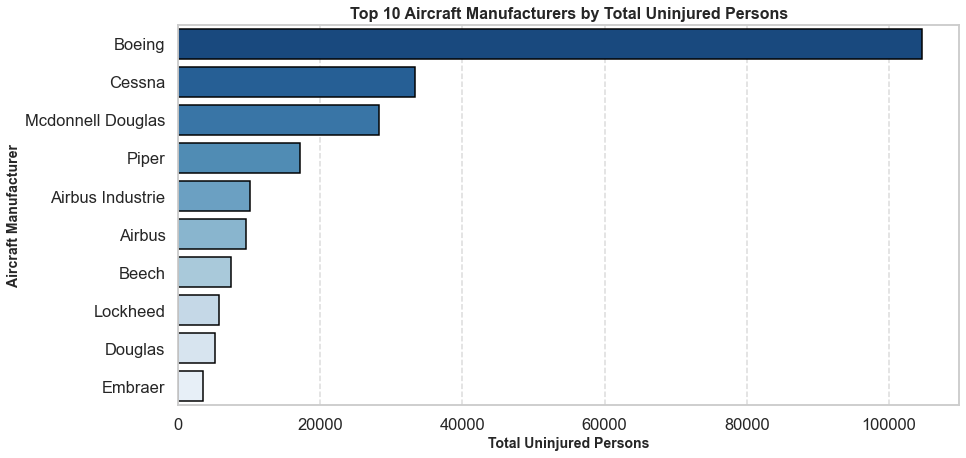

In [23]:
# Group by aircraft manufacturer and sum total uninjured persons
uninjured_by_make = df.groupby("Make")["Total.Uninjured"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=uninjured_by_make.values, y=uninjured_by_make.index, palette="Blues_r", edgecolor="black")


plt.xlabel("Total Uninjured Persons", fontsize=14, fontweight='bold')
plt.ylabel("Aircraft Manufacturer", fontsize=14, fontweight='bold')
plt.title("Top 10 Aircraft Manufacturers by Total Uninjured Persons", fontsize=16, fontweight='bold')

# Show plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- Boeing has the highest number of uninjured persons, exceeding 100,000 maybe due to airline safety measures.

## Conclusions

- **Aircraft Damage Distribution by Manufacturer**: Cessna and Piper aircraft experience the highest damage rates, showing that general aviation aircraft tend to sustain more significant damage in accidents.

- **Fatalities by Phase of Flight**: The cruise and maneuvering phases account for the most fatalities, highlighting critical phases where fatal incidents are more frequent.

- **Fatality Rate by Aircraft Model**: The Boeing 737 has the highest fatalities, potentially due to its widespread use, with older models also showing significant accident data.

- **Total Uninjured Persons by Aircraft Make**: Boeing, Cessna, and McDonnell Douglas record the highest number of uninjured passengers, reflecting trends in survivability across different aircraft types.